<a href="https://colab.research.google.com/github/RajiSh21/Ml_practise/blob/main/img_cls_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
#lib
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [13]:
#load data
# Transform: convert images to tensor and normalize
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load training and test data
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

In [15]:
#model
class SimpleNet(nn.Module):
    def __init__(self):
        super(SimpleNet, self).__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28*28)  # Flatten the images
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = SimpleNet()

In [16]:
#loss optimization
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [21]:
#train
epochs = 2
for epoch in range(epochs):
    running_loss = 0.0
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f"Epoch {epoch+1}, Loss: {running_loss/len(trainloader)}")
print("Training complete.")

Epoch 1, Loss: 0.08078161854473656
Epoch 2, Loss: 0.07252068813569518
Training complete.


In [22]:
#test
correct = 0
total = 0
with torch.no_grad():
    for images, labels in testloader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
print(f"Accuracy on test set: {100 * correct / total:.2f}%")

Accuracy on test set: 96.90%


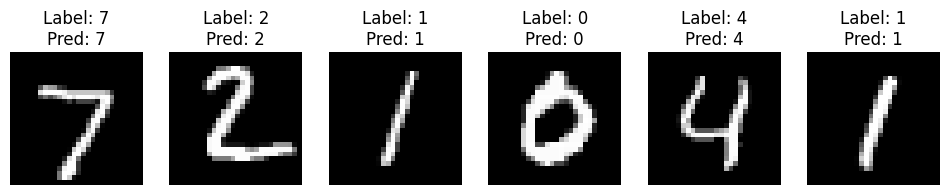

In [24]:
#visualize
# Get some random test images
dataiter = iter(testloader)
images, labels = next(dataiter)

# Predict
outputs = model(images)
_, predicted = torch.max(outputs, 1)

# Show images and predictions
fig, axes = plt.subplots(1, 6, figsize=(12,2))
for idx in range(6):
    axes[idx].imshow(images[idx].squeeze(), cmap='gray')
    axes[idx].set_title(f"Label: {labels[idx]}\nPred: {predicted[idx].item()}")
    axes[idx].axis('off')
plt.show()